In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read data into a df
train_data = pd.read_csv('C:\\Users\\ashwani\\Project_ML_Finance/train_loan.csv')
test_data = pd.read_csv('C:\\Users\\ashwani\\Project_ML_Finance/test_loan.csv')

In [3]:
# Combining train and test data
total_data = pd.concat([train_data, test_data])

In [4]:
# Checking the shape of train, test & total data
print (train_data.shape)
print (test_data.shape)
print (total_data.shape)

(614, 13)
(367, 12)
(981, 13)


In [5]:
# Checking the size of train, test & total data
print (train_data.size, test_data.size, total_data.size)

7982 4404 12753


In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [7]:
total_data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [8]:
total_data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [9]:
#check the distribution of the target variable Loan_Status
train_data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#check number of unique values in data.
total_data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
dtype: int64

In [11]:
#check for Nulls/NaNs.
total_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [12]:
print (sum(train_data.Credit_History.isnull()), sum(test_data.Credit_History.isnull()))

50 29


In [13]:
#We have 79 nulls in the Credit History column. They are spread between both the train and the test dataset. 
#Changing the column to a column of string type with values 'Yes', 'No', 'Unknown'.

repl_dict = {1.0:'Yes', 0.0:'No'}

train_data.Credit_History = train_data.Credit_History.replace(repl_dict)
test_data.Credit_History = test_data.Credit_History.replace(repl_dict)
train_data.Credit_History = train_data.Credit_History.fillna('Unknown')
test_data.Credit_History = test_data.Credit_History.fillna('Unknown')

In [14]:
#All Nan values removed from train and test data credit history feature.
print (sum(train_data.Credit_History.isnull()), sum(test_data.Credit_History.isnull()))

0 0


In [15]:
print (sum(train_data.Dependents.isnull()), sum(test_data.Dependents.isnull()))

15 10


In [16]:
#There are 25 nulls in the Dependents column. They are spread between both the train and the test set. 
train_data.Dependents = train_data.Dependents.fillna('Unknown')
test_data.Dependents = test_data.Dependents.fillna('Unknown')

In [17]:
#All Nan values removed from train and test data dependents feature.
print (sum(train_data.Dependents.isnull()), sum(test_data.Dependents.isnull()))

0 0


In [18]:
print (sum(train_data.Gender.isnull()), sum(test_data.Gender.isnull()))

13 11


In [19]:
#There are 24 nulls in the Gender column. They are spread between both the train and the test set.
train_data.Gender = train_data.Gender.fillna('NotMentioned')
test_data.Gender = test_data.Gender.fillna('NotMentioned')

In [20]:
#All Nan values removed from train and test data Gender feature.
print (sum(train_data.Gender.isnull()), sum(test_data.Gender.isnull()))

0 0


In [21]:
print (sum(train_data.Self_Employed.isnull()), sum(test_data.Self_Employed.isnull()))

32 23


In [22]:
#There are 55 nulls in the Self_Employed column. They are spread between both train and the test set.
train_data.Self_Employed = train_data.Self_Employed.fillna('Unknown')
test_data.Self_Employed = test_data.Self_Employed.fillna('Unknown')

In [23]:
#All Nan values removed from train and test data Self employed feature.
print (sum(train_data.Self_Employed.isnull()), sum(test_data.Self_Employed.isnull()))

0 0


In [24]:
print (sum(train_data.Married.isnull()), sum(test_data.Married.isnull()))

3 0


In [25]:
#There are 3 nulls in the Married column and Only in the Train set.
train_data.Married = train_data.Married.fillna('Unknown')

In [26]:
#All Nan values removed from train data Married feature.
print (sum(train_data.Married.isnull()), sum(test_data.Married.isnull()))

0 0


In [27]:
print (sum(train_data.Loan_Amount_Term.isnull()), sum(test_data.Loan_Amount_Term.isnull()))

14 6


In [28]:
#There are 20 nulls in the Loan_Amount_Term column. They are spread between both train and the test set.
train_data.Loan_Amount_Term = train_data.Loan_Amount_Term.fillna(train_data.Loan_Amount_Term.mean())  
test_data.Loan_Amount_Term = test_data.Loan_Amount_Term.fillna(test_data.Loan_Amount_Term.mean())  

In [29]:
#All Nan values removed from train and test data Loan_Amount_Term feature.
print (sum(train_data.Loan_Amount_Term.isnull()), sum(test_data.Loan_Amount_Term.isnull()))

0 0


In [30]:
print (sum(train_data.LoanAmount.isnull()), sum(test_data.LoanAmount.isnull()))

22 5


In [31]:
#There are also 27 null values in the loan amount column. They are spread between both train and the test set.
train_data.LoanAmount = train_data.LoanAmount.fillna(train_data.LoanAmount.mean())  
test_data.LoanAmount = test_data.LoanAmount.fillna(test_data.LoanAmount.mean())    

In [32]:
#All Nan values removed from train and test data Loan Amount feature.
print (sum(train_data.LoanAmount.isnull()), sum(test_data.LoanAmount.isnull()))

0 0


In [33]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [44]:
train_data.to_csv('train_data2.csv', index=False)
test_data.to_csv('test_data2.csv', index=False)

In [45]:
train = pd.read_csv('C:\\Users\\ashwani\\Project_ML_Finance/train_data2.csv')
test = pd.read_csv('C:\\Users\\ashwani\\Project_ML_Finance/test_data2.csv')
data = pd.concat([train,test])

In [119]:
print (train.shape)
print (test.shape)
print (data.shape)

(614, 13)
(367, 12)
(981, 13)


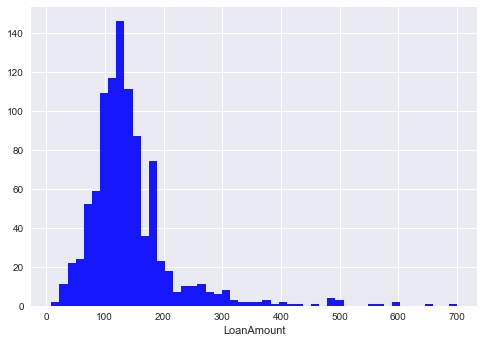

In [46]:
#Loan Amount Distribution Plot
sns.distplot(data['LoanAmount'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

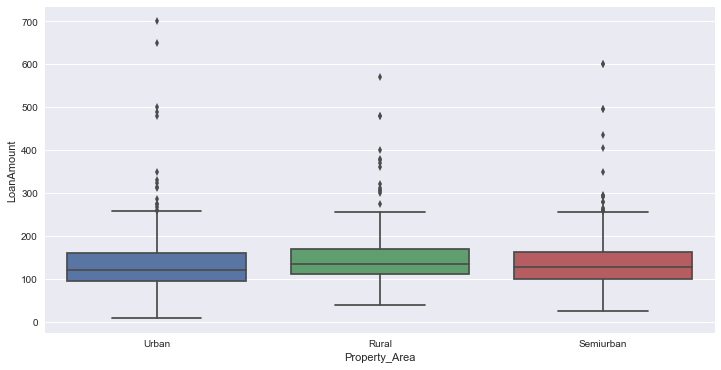

In [47]:
#Plot to see how loan amounts vary by property area.
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Property_Area', y = 'LoanAmount',  data = train)

In [48]:
replace_dict = {'Y':1, 'N':0}
train.Loan_Status = train.Loan_Status.replace(replace_dict)

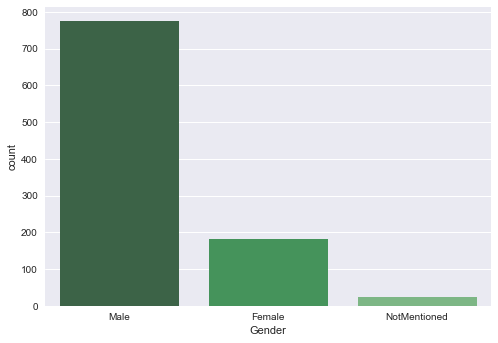

In [40]:
#Gender wise count of Applicants  
sns.countplot(x="Gender", data=data, palette="Greens_d")

,Gender,Loan_Status,Count
0,Female,N,37
1,Female,Y,75
2,Male,N,150
3,Male,Y,339
4,NotMentioned,N,5
5,NotMentioned,Y,8


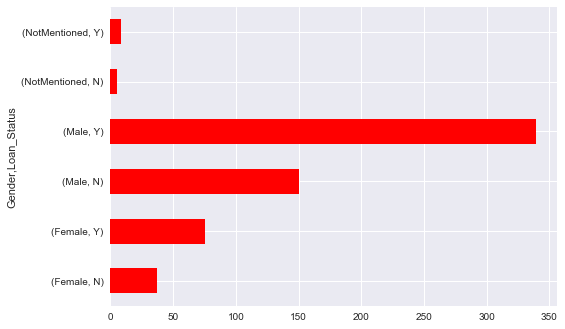

In [136]:
# Gender wise Loan Approval Analysis
gb_gender = data.groupby(by=["Gender", "Loan_Status"])
gbs_gender = gb_gender.size()
gbs_gender.plot(kind='barh', color="red")
gbs_gender= pd.DataFrame(gbs_gender.reset_index(name= 'Count'))
gbs_gender

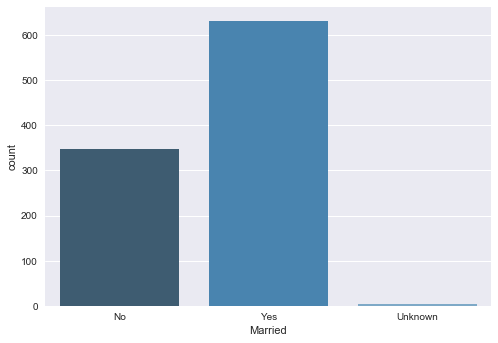

In [44]:
# Marriage Status wise count of Applicants
sns.countplot(x="Married", data=data, palette="Red_d")

,Married,Loan_Status,Count
0,No,N,79
1,No,Y,134
2,Unknown,Y,3
3,Yes,N,113
4,Yes,Y,285


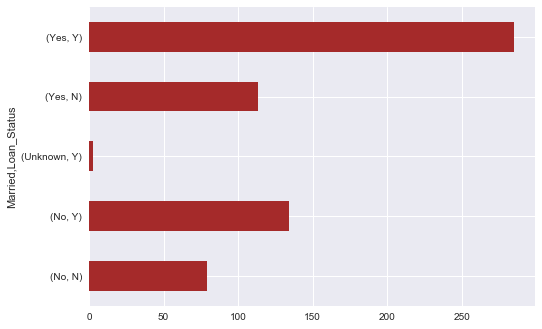

In [139]:
# Marriage Status wise Loan Approval Analysis
gb_married = data.groupby(by=["Married", "Loan_Status"])
gbs_married = gb_married.size()
gbs_married.plot(kind='barh', color="brown")
gbs_married= pd.DataFrame(gbs_married.reset_index(name= 'Count'))
gbs_married

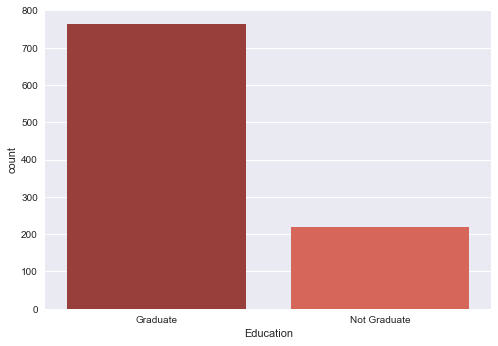

In [140]:
# Education wise count of Applicants
sns.countplot(x="Education", data=data, palette="Reds_d")

,Education,Loan_Status,Count
0,Graduate,N,140
1,Graduate,Y,340
2,Not Graduate,N,52
3,Not Graduate,Y,82


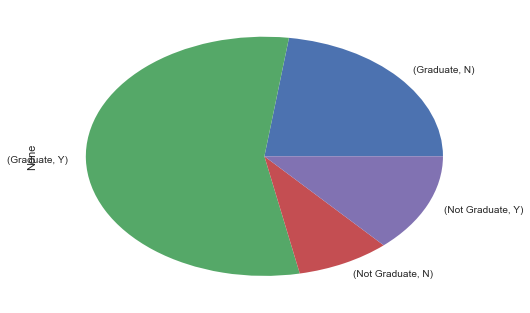

In [142]:
# Education wise Loan Approval Analysis
gb_education = data.groupby(by=["Education", "Loan_Status"])
gbs_education = gb_education.size()
gbs_education.plot(kind='pie')
gbs_education= pd.DataFrame(gbs_education.reset_index(name= 'Count'))
gbs_education

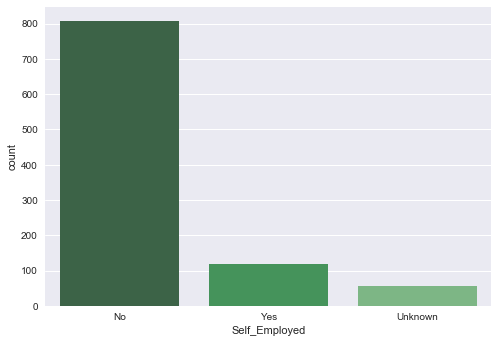

In [143]:
# Employment wise count of Applicants
sns.countplot(x="Self_Employed", data=data, palette="Greens_d")

,Self_Employed,Loan_Status,Count
0,No,N,157
1,No,Y,343
2,Unknown,N,9
3,Unknown,Y,23
4,Yes,N,26
5,Yes,Y,56


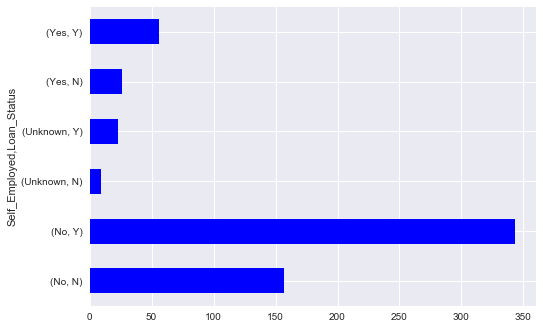

In [148]:
# Employment wise Loan Approval Analysis
gb_self_employed = data.groupby(by=["Self_Employed", "Loan_Status"])
gbs_self_employed = gb_self_employed.size()
gbs_self_employed.plot(kind='barh', color = "blue")
gbs_self_employed= pd.DataFrame(gbs_self_employed.reset_index(name= 'Count'))
gbs_self_employed

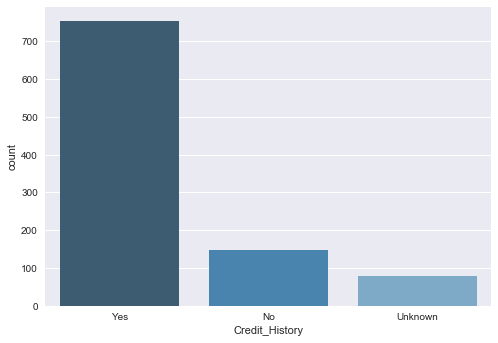

In [153]:
# Credit History wise count of Applicants
sns.countplot(x="Credit_History", data=data, palette="Blues_d")

,Credit_History,Loan_Status,Count
0,No,N,82
1,No,Y,7
2,Unknown,N,13
3,Unknown,Y,37
4,Yes,N,97
5,Yes,Y,378


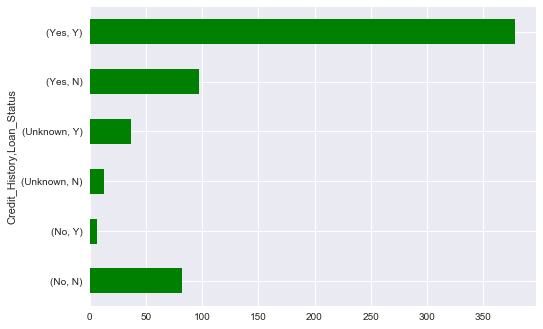

In [157]:
# Credit History wise Loan Approval Analysis
gb_credit_history = data.groupby(by=["Credit_History", "Loan_Status"])
gbs_credit_history = gb_credit_history.size()
gbs_credit_history.plot(kind='barh', color = "green")
gbs_credit_history= pd.DataFrame(gbs_credit_history.reset_index(name= 'Count'))
gbs_credit_history

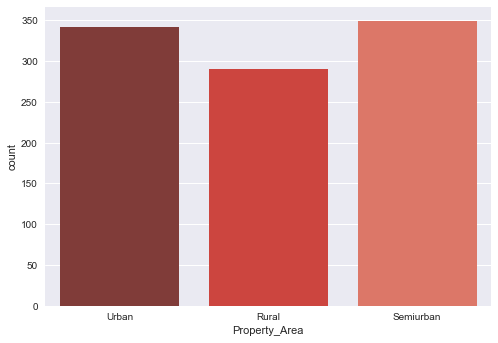

In [155]:
# Property_Area wise count of Applicants
sns.countplot(x="Property_Area", data=data, palette="Reds_d")

,Property_Area,Loan_Status,Count
0,Rural,N,69
1,Rural,Y,110
2,Semiurban,N,54
3,Semiurban,Y,179
4,Urban,N,69
5,Urban,Y,133


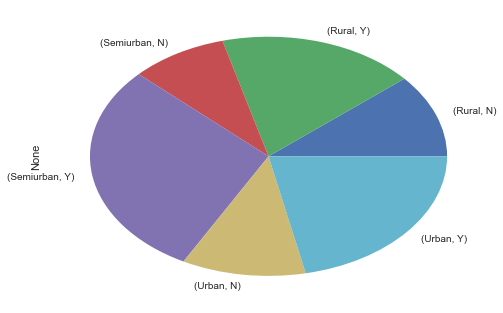

In [151]:
# Property Area wise Loan Approval Analysis
gb_property_area = data.groupby(by=["Property_Area", "Loan_Status"])
gbs_property_area = gb_property_area.size()
gbs_property_area.plot(kind='pie')
gbs_property_area= pd.DataFrame(gbs_property_area.reset_index(name= 'Count'))
gbs_property_area

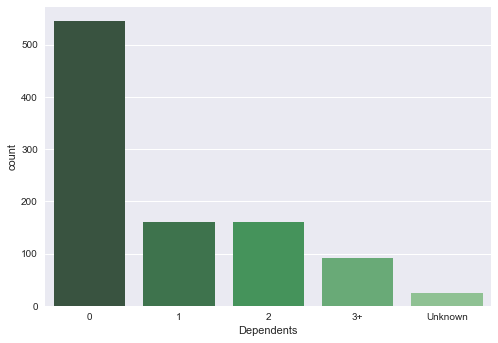

In [156]:
# No. of Dependents wise count of Applicants
sns.countplot(x="Dependents", data=data, palette="Greens_d")

,Dependents,Loan_Status,Count
0,0,N,107
1,0,Y,238
2,1,N,36
3,1,Y,66
4,2,N,25
5,2,Y,76
6,3+,N,18
7,3+,Y,33
8,Unknown,N,6
9,Unknown,Y,9


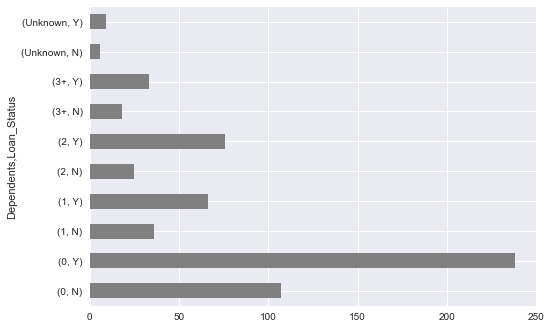

In [159]:
# No. of Dependents wise Loan Approval Analysis
gb_dependents = data.groupby(by=["Dependents", "Loan_Status"])
gbs_dependents = gb_dependents.size()
gbs_dependents.plot(kind='barh', color = "grey")
gbs_dependents= pd.DataFrame(gbs_dependents.reset_index(name= 'Count'))
gbs_dependents